## 特徵選擇 (Feature Selection)

In [1]:
import pandas
df = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/python_for_data_science/master/Data/customer_behavior.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
bachelor     12 non-null int64
gender       12 non-null int64
age          12 non-null int64
salary       12 non-null int64
purchased    12 non-null int64
dtypes: int64(5)
memory usage: 560.0 bytes


In [3]:
X = df[['bachelor','gender', 'age', 'salary']]

In [4]:
X

,bachelor,gender,age,salary
0,1,0,23,1500
1,1,0,30,2500
2,1,0,32,1800
3,1,0,25,1700
4,1,0,27,1200
5,1,1,26,1000
6,1,1,35,3500
7,1,0,23,2000
8,1,0,22,1800
9,1,0,21,1700


In [6]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold()


In [7]:
sel

VarianceThreshold(threshold=0.0)

In [11]:
X.var()

bachelor    0.000000e+00
gender      2.424242e-01
age         3.324242e+01
salary      1.292955e+06
dtype: float64

In [8]:
X_val = sel.fit_transform(X)


In [9]:
sel

VarianceThreshold(threshold=0.0)

In [10]:
X_val

array([[   0,   23, 1500],
       [   0,   30, 2500],
       [   0,   32, 1800],
       [   0,   25, 1700],
       [   0,   27, 1200],
       [   1,   26, 1000],
       [   1,   35, 3500],
       [   0,   23, 2000],
       [   0,   22, 1800],
       [   0,   21, 1700],
       [   1,   38, 5000],
       [   1,   20, 1200]])

In [18]:
#df.columns
#sel.get_support()
df.loc[:,sel.get_support()]

,gender,age,salary
0,0,23,1500
1,0,30,2500
2,0,32,1800
3,0,25,1700
4,0,27,1200
5,1,26,1000
6,1,35,3500
7,0,23,2000
8,0,22,1800
9,0,21,1700


In [19]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [20]:
X = df[['bachelor','gender', 'age', 'salary']]


In [21]:
y = df['purchased'].values


In [22]:
clf = SelectKBest(chi2, k=2)
clf.fit(X,y)


SelectKBest(k=2, score_func=<function chi2 at 0x1258d2840>)

In [23]:
clf.scores_

array([   0.        ,    0.        ,    4.48447205, 2766.66666667])

In [25]:
X_new = clf.fit_transform(X,y)
print(X_new[0:3,:])


[[  23 1500]
 [  30 2500]
 [  32 1800]]


In [31]:
a = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7']
from itertools import combinations
ary = []
for i in range(1,6):
    ary += combinations(a,i)

In [32]:
len(ary)

119

In [33]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

clf = SVC(kernel='linear')

rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_val,y)


RFE(estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
  n_features_to_select=1, step=1, verbose=0)

In [34]:
rfe.ranking_

array([3, 2, 1])

In [35]:
rfe.support_

array([False, False,  True])

In [39]:
names = ['gender', 'age', 'salary']

In [51]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, random_state=123)

clf.fit(X_val, y)

#names, clf.feature_importances_
for feature in zip(names, clf.feature_importances_):
    print(feature)


('gender', 0.0933015873015873)
('age', 0.39391203703703703)
('salary', 0.5127863756613757)


In [52]:
importance = clf.feature_importances_


Populating the interactive namespace from numpy and matplotlib


/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


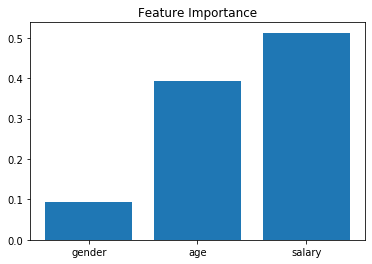

In [53]:
% pylab inline
import matplotlib.pyplot as plt
plt.title('Feature Importance')
plt.bar(range(0, len(names)), importance)
plt.xticks(range(0,len(names)), names)
plt.show()


## 小任務
- 請使用 rfe 找出 iris 資料中，哪兩個欄位最重要?

In [54]:
from sklearn.datasets import load_iris
iris= load_iris()

In [58]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [59]:
clf = DecisionTreeClassifier()

rfe = RFE(clf, n_features_to_select=2)
rfe.fit(iris.data,iris.target)


RFE(estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
  n_features_to_select=2, step=1, verbose=0)

In [60]:
rfe.get_support()

array([False, False,  True,  True])

In [61]:
rfe.ranking_

array([3, 2, 1, 1])

In [62]:
from sklearn.feature_selection import RFECV

In [63]:
rfe = RFECV(clf, step=1, cv=5)

In [64]:
rfe.fit(iris.data,iris.target)

RFECV(cv=5,
   estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
   n_jobs=1, scoring=None, step=1, verbose=0)

In [65]:
rfe.get_support()

array([ True,  True,  True,  True])

In [66]:
rfe.ranking_

array([1, 1, 1, 1])

## 特徵萃取

In [68]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [69]:
X = iris.data
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [70]:
X_reduced = pca.transform(X)

In [71]:
X.shape

(150, 4)

In [72]:
X_reduced.shape

(150, 2)

In [78]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [80]:
X[0:3,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [79]:
X_reduced[0:3,:]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561]])

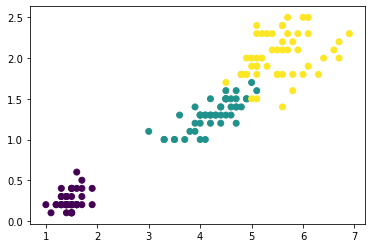

In [84]:
from matplotlib import pyplot as plt
X = iris.data[:,[2,3]]
plt.scatter(X[:,0], X[:,1], c =iris.target)

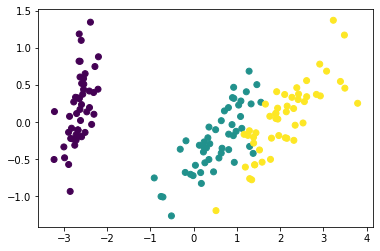

In [89]:
plt.scatter(X_reduced[:,0], X_reduced[:,1], c =iris.target)

In [90]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')
clf.fit(X_reduced , iris.target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

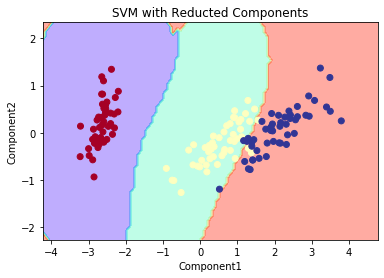

In [91]:
import numpy as np
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

plt.plot()
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.rainbow)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=iris.target, alpha=1, cmap = plt.cm.RdYlBu)
plt.title('SVM with Reducted Components')
plt.xlabel('Component1')
plt.ylabel('Component2')
plt.show()

In [92]:
pca.explained_variance_

array([4.22484077, 0.24224357])

In [93]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [94]:
pca.explained_variance_ratio_.sum()

0.9776317750248034

In [95]:
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component, iris.feature_names)))


0.362 x sepal length (cm) + -0.082 x sepal width (cm) + 0.857 x petal length (cm) + 0.359 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.176 x petal length (cm) + -0.075 x petal width (cm)


In [99]:
pca.components_

array([[ 0.36158968, -0.08226889,  0.85657211,  0.35884393],
       [ 0.65653988,  0.72971237, -0.1757674 , -0.07470647]])

In [96]:
X_reduced[0:3,:]

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561]])

In [98]:
iris.data[0:3,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [100]:
pca.explained_variance_

array([4.22484077, 0.24224357])

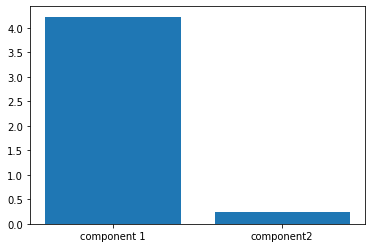

In [101]:
plt.bar(range(0,2), pca.explained_variance_)
plt.xticks(range(0,2), ['component 1', 'component2'])
plt.show()


In [102]:
import pandas
news = pandas.read_excel('https://raw.githubusercontent.com/ywchiu/taipeifubon/master/data/20150628news.xlsx', index_col = 0)

In [103]:
news.head()

,category,description,pubdate,title
0,社會/生活,新北市八仙水上樂園昨晚發生粉塵爆炸，新北市衛生局統計到目前為止，由救護車送醫再加上自行送醫的...,"Sun, 28 Jun 2015 07:40:00 +0800",八仙塵爆 五相關人依公共危險重傷害法辦
1,社會/生活,新北市八仙樂園昨天晚上(6/27)舉辦活動，過程中噴灑大量玉米粉而引發粉塵爆炸，根據最新統計...,"Sun, 28 Jun 2015 07:40:00 +0800",八仙樂園意外 病患持續增加中
2,財經/要聞,希臘債務違約限期逼近，資金持續外流。路透社引述三間銀行的消息指出，希臘國內有3分之1的自動櫃...,"Sun, 28 Jun 2015 07:40:00 +0800",希臘國內三分一自動櫃員機現金短缺
3,社會/生活,台鐵「新基隆車站」第一階段工程本月底完成，台鐵表示，明天（29號）啟用後，由於南站周邊道路尚...,"Sun, 28 Jun 2015 07:40:00 +0800",台鐵新基隆車站29日正式啟用
4,財經/要聞,《中國時報》\n●樂園變煉獄 派對驚爆 逾300人遭火紋身\n八仙樂園昨晚舉辦「COLOR ...,"Sun, 28 Jun 2015 07:38:17 +0800",6月28日各報頭版要聞


In [104]:
import jieba
corpus = []
for idx, rec in news.iterrows():
    corpus.append(' '.join(jieba.cut(rec['description'])))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/46/b7dzk4mn6g54qzptv608w7d00000gn/T/jieba.cache
Loading model cost 0.667 seconds.
Prefix dict has been built succesfully.


In [106]:
from sklearn.feature_extraction.text import CountVectorizer
clf = CountVectorizer()
X = clf.fit_transform(corpus)

In [109]:
from sklearn.metrics.pairwise import cosine_distances
cs = cosine_distances(X)

In [110]:
cs.shape

(147, 147)

In [111]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
cs_reduced = pca.fit_transform(cs)

In [114]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
groups = kmeans.fit_predict(cs_reduced)

In [115]:
cs_reduced.shape

(147, 2)

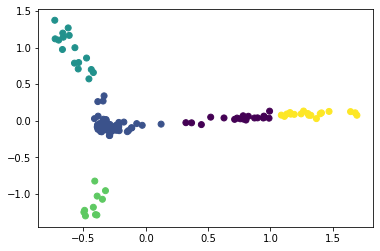

In [116]:
plt.scatter(cs_reduced[:,0], cs_reduced[:,1], c = groups)

In [118]:
pca.explained_variance_

array([0.40598142, 0.20757363])

In [119]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
cs_reduced = pca.fit_transform(cs)

In [122]:
pca.explained_variance_[0:5].sum()

0.8440332539309572